# 從PTT的女性中觀察徵友標準 
 想探討出社會的女性之 擇偶/徵友 標準
 資料來源：
 2020一整年 PTT_AllTogether 聯誼板 "徵男" 的內文

In [13]:
import json
import matplotlib.pyplot as plt
import jieba
import jieba.analyse
import numpy as np
from PIL import Image
import collections
import os
#import cv2

from collections import Counter
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  
plt.rcParams['axes.unicode_minus'] = False

#### 使用 ptt-webcrawler 爬下AllTogether版2020年的所有文章

#### 存成json檔後，開始進行分析

#### 發現徵女文章 >> 徵男文章，因此我們要尋找稀少性(女性徵男)的文章

* 套件使用: https://github.com/jwlin/ptt-web-crawler

In [5]:
#讀取爬下來的json檔案，並且將標題有徵男的文章內容放入list
with open("AllTogether-2883-3555.json", "r" , encoding = "utf-8" ) as file_object:
    data = json.load(file_object)

word_list_girl = []
word_list_boy = []
pair = []
a = 0

for i in range(0,len(data['articles'])):
    if "error" in data['articles'][i]:
        continue
    elif "徵男" in data['articles'][i]['article_title']:
        content = data['articles'][i]['content']
        word_list_girl.append(content)
    elif "徵女" in data['articles'][i]['article_title']:
        content2 = data['articles'][i]['content']
        word_list_boy.append(content2)
    elif "大心" in data['articles'][i]['article_title']:
        content3 = data['articles'][i]['content']
        pair.append(content2)
        


#### 為了剔除短期徵友(如:吃飯、看電影等短期約會)的文章
#### 發現徵長期、短期朋友的文章的區別在於: 
#### 長期通常會出現 「關於你、關於我、About me、About you」的關鍵字


In [ ]:
#整理內容有"關於我"、"關於你"、"希望你" 的文章
ana_list = []
for word in word_list_girl:
    if "關於我" in word  or "關於你" in word  or "希望你" in word:
        ana_list.append(word)

#### 將關於我、關於你的內容切割
#### 透過自訂的字庫統計相關條件出現的頻率
#### 藉此歸納出 徵求和被徵求者的條件
* 使用 Jieba 斷詞 & 繁體 Stop Words自定義字典分析詞性


In [8]:
#使用jieba斷出每個詞，並把停詞去除

#讀入停詞txt
def ptt_jieba(stopword,dic,ana_list):
    stopwords=[" "]
    with open(stopword , 'r', encoding='UTF-8') as file:
        for data in file.readlines():
            data = data.strip()
            stopwords.append(data)
    jieba.load_userdict(dic)
    jieba_list = []
    for i in range(0,len(ana_list)):
        seg = jieba.cut(ana_list[i])
        seg_list = list(filter(lambda a: a not in stopwords and a != '\n', seg)) #去除停詞
        jieba_list.append(seg_list)
    return jieba_list
    
jieba_list = ptt_jieba("stopword.txt","dict.txt",ana_list)


In [9]:
#Function_jieba

#關於我
def about_me_f(jieba_list):
    about_me = []
    for i in range(0,len(jieba_list)):
        count_list = []
        for j in range(0,len(jieba_list[i])):
            if jieba_list[i][j] == "關於我":
                while True :
                    if j == len(jieba_list[i])-1:
                        break
                    elif jieba_list[i][j] == "關於你" or jieba_list[i][j] == "希望你":
                        break
                    j += 1
                    count_list.append(jieba_list[i][j])
                about_me.append(count_list)
                break
    return about_me


#關於你、希望你
def about_you_f(jieba_list):
    about_you = []
    for i in range(0,len(jieba_list)):
        count_list = []
        for j in range(0,len(jieba_list[i])):
            if jieba_list[i][j] == "關於你" or jieba_list[i][j] == "希望你":
                while True:
                    if j == len(jieba_list[i])-1:
                        break
                    elif jieba_list[i][j] == "關於我" :
                        break
                    j += 1
                    count_list.append(jieba_list[i][j])
                about_you.append(count_list)
                break
    return about_you

about_me = about_me_f(jieba_list)
about_you = about_you_f(jieba_list)

In [10]:
#function without jieba
            
def combine_word(about):
    combine = []
    for i in range(0,len(about)):
        count = ""
        seq = []
        for word in about[i]:
            count += word
        seq.append(count)
        combine.append(seq)
    return combine

#### 數值處裡
* 身高
* 體重
* 年齡
#### 畫出直方圖統計

In [35]:
#計算身高體重
num_list = []
for i in range(0,2000):
    num_list.append(str(i))

about_me_int = []
for i in range(0,len(about_me)):
    for j in range(0,len(about_me[i])):
        for k in range(0,len(num_list)):
            if about_me[i][j] == num_list[k]:
                about_me_int.append(int(about_me[i][j]))
                break
            
b = about_me_int[:]
for i in b:
    if i < 19:
        b.remove(i)
about_me_int = b
        
me_weight = []
me_height = []
me_age = []
 
for i in about_me_int:
    if i >= 140 and i <= 200:
        me_height.append(i)
    if i > 1902 and i < 2002:
        me_age.append(2020-i)
    if i >= 18 and i <= 40:
        me_age.append(i)
    if i >= 69 and i <= 91:
        me_age.append(109 - i)
    if i > 40 and i < 65:
        me_weight.append(i)



In [36]:
def hist(var,bins,range1,range2,name):
    plt.figure(figsize=(10,10))
    plt.title(name)
    plt.hist(var, bins=bins, range=(range1, range2))
    plt.show()

文章作者平均身高 = 162


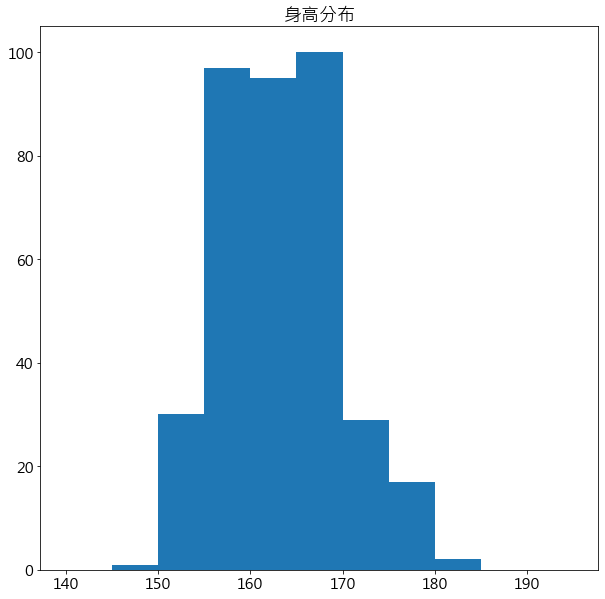

In [37]:
print("文章作者平均身高 = %d" %np.mean(me_height))
hist(me_height,11,140,195,"身高分布")

文章作者平均體重 = 51


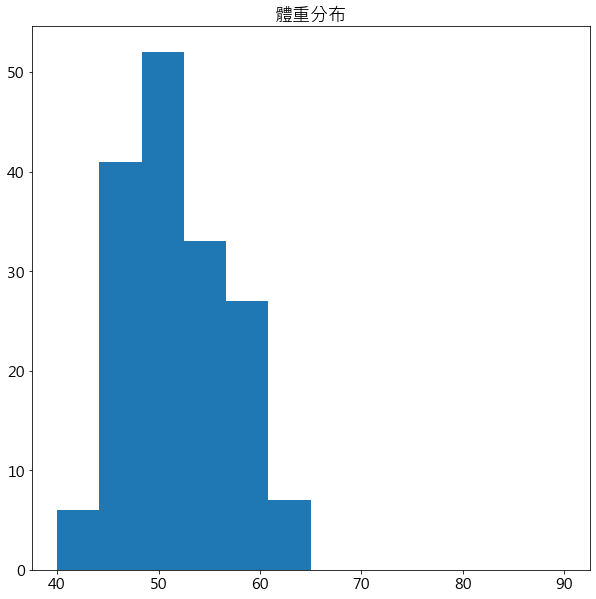

In [38]:
print("文章作者平均體重 = %d" %np.mean(me_weight)) 
hist(me_weight,12,40,90,"體重分布")

文章作者平均年齡 = 30


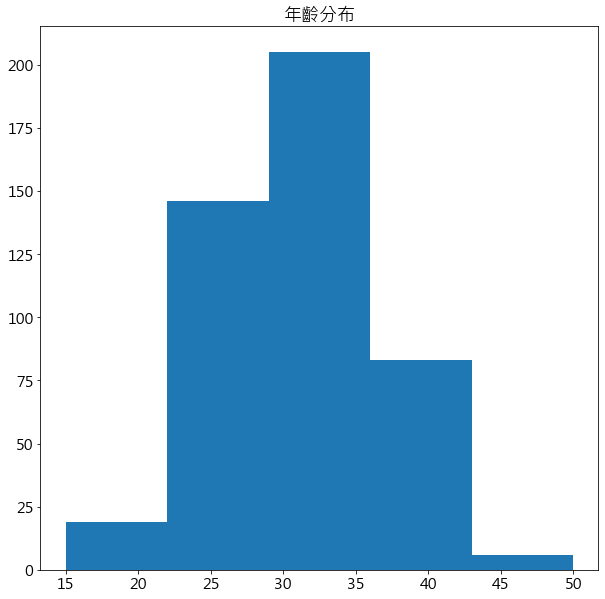

In [39]:
print("文章作者平均年齡 = %d" %np.mean(me_age))
hist(me_age,5,15,50,"年齡分布")

#### 文字處理(希望男友的...)
* 嗜好
* 條件
* 星座
* 居住地

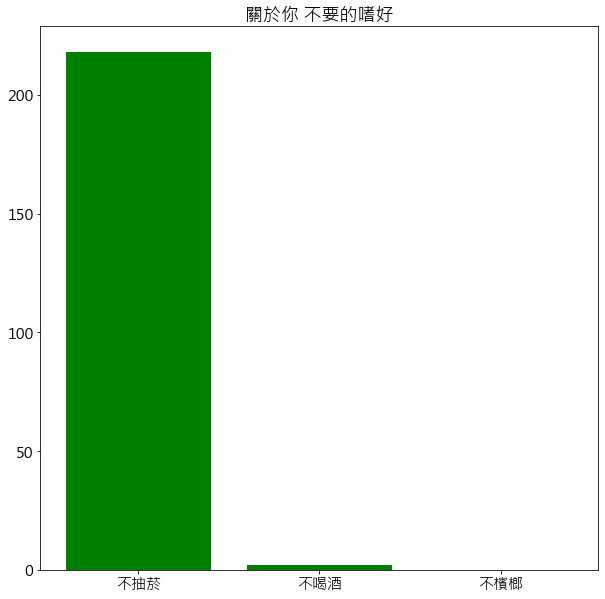

<Figure size 432x288 with 0 Axes>

In [23]:
#關於你 no need

def about_you_condition(about,dic):
    for i in range(0,len(about)):
        for j in range(0,len(about[i])):
            for k in list(dic):
                if k in about[i][j]:
                    dic[k] += 1
                    break
                
def bar_chart(dic,name):
    plt.figure(figsize=(10,10))
    plt.rcParams['font.size'] = 15
    plt.bar(list(dic.keys()), dic.values(), color='g', tick_label = list(dic))
    plt.title(name)
    plt.show() 
    plt.savefig(name + '.png')

    
about_you_term = ptt_jieba("stopword.txt","dict_no_need.txt",ana_list)
about_you_term = about_you_f(about_you_term)
about_you_term = combine_word(about_you_term)

no_need = {"不用兩輪":0,"不用四輪":0,"不用有車":0,"不用有房":0,}

no_habbit = {"不抽菸":0,"不抽煙":0,"不菸":0,"不煙":0,
          "不喝酒":0,"不檳榔":0}

about_you_condition(about_you_term,no_need)
about_you_condition(about_you_term,no_habbit)

no_habbit["不抽菸"] += no_habbit["不抽煙"]
no_habbit["不抽菸"] += no_habbit["不煙"]
no_habbit["不抽菸"] += no_habbit["不菸"]
del no_habbit["不抽煙"]
del no_habbit["不煙"]
del no_habbit["不菸"]

bar_chart(no_habbit ,"關於你 不要的嗜好")

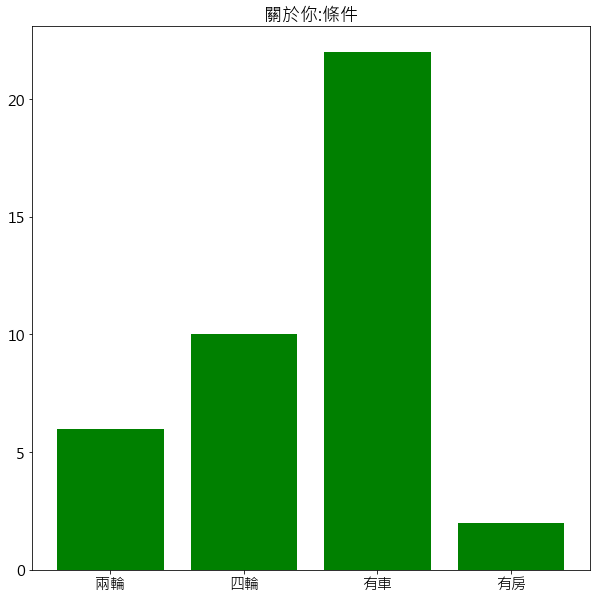

<Figure size 432x288 with 0 Axes>

In [24]:
about_you_term = ptt_jieba("stopword.txt","dict_need.txt",ana_list)
about_you_term = about_you_f(about_you_term)
about_you_term = combine_word(about_you_term)

need = {"兩輪":0,"四輪":0,"有車":0,"需要有車":0,"有房":0}
about_you_condition(about_you_term,need)
del need["需要有車"]
bar_chart(need ,   "關於你:條件")

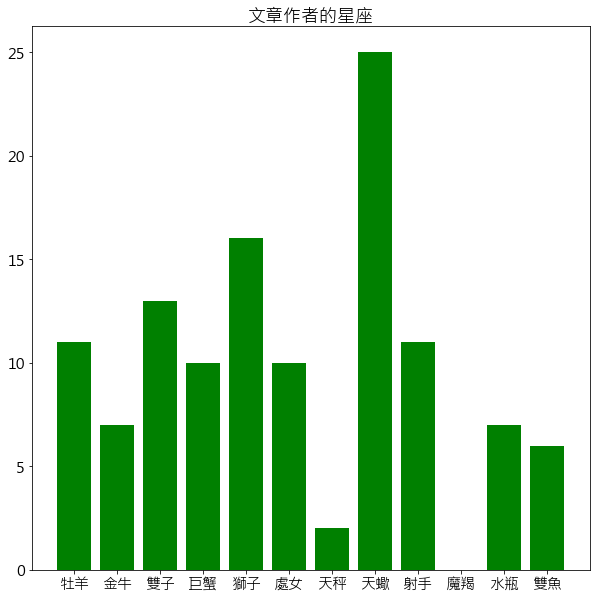

<Figure size 432x288 with 0 Axes>

In [25]:
#關於我星座，統計並畫圖

signs_dict = {"牡羊":0,"金牛":0,"雙子":0,"巨蟹":0,
              "獅子":0,"處女":0,"天秤":0,"天蠍":0,
              "射手":0,"魔羯":0,"水瓶":0,"雙魚":0} 

for i in range(0,len(about_me)):
    for j in range(0,len(about_me[i])):
        for k in list(signs_dict):
            if about_me[i][j] == k:
                signs_dict[k] += 1
                break
        

bar_chart(signs_dict , "文章作者的星座")

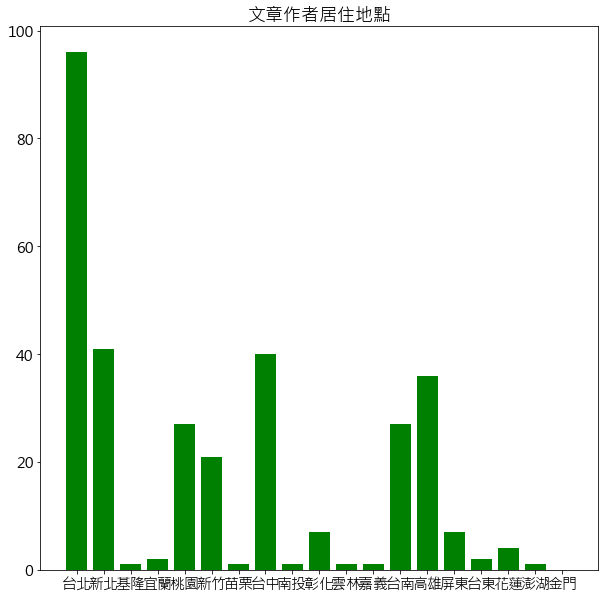

<Figure size 432x288 with 0 Axes>

In [26]:
#region
region_dict = {"台北":0,"臺北":0,"新北":0,"基隆":0,"宜蘭":0,
               "桃園":0,"新竹":0,"苗栗":0,"台中":0,"臺中":0,
               "南投":0,"彰化":0,"雲林":0,"嘉義":0,"台南":0,
               "臺南":0,"高雄":0,"屏東":0,"台東":0,"臺東":0,
               "花蓮":0,"澎湖":0,"金門":0}

for i in range(0,len(about_me)):
    for j in range(0,len(about_me[i])):
        for k in list(region_dict):
            if about_me[i][j] == k:
                region_dict[k] += 1
                break

region_dict["台北"] += region_dict["臺北"]
region_dict["台中"] += region_dict["臺中"]
region_dict["台南"] += region_dict["臺南"]
region_dict["台東"] += region_dict["臺東"]

del region_dict['臺北']
del region_dict['臺中']
del region_dict['臺南']
del region_dict['臺東']

bar_chart(region_dict , "文章作者居住地點")

#### 用文字雲表示文章中
* 關於我...的詞頻
* 關於你...的詞頻
* 形容詞的詞頻
* 全文章的詞頻

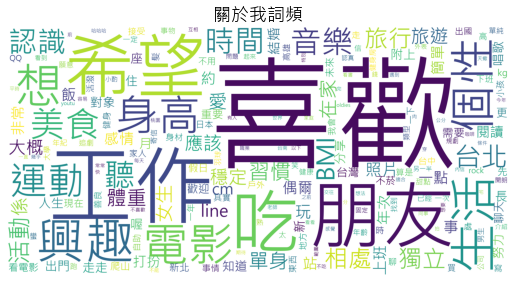

In [42]:
# 整理關於我、你的詞頻
# 畫出直方圖、文字雲

from wordcloud import WordCloud

def hist_cloud(about_me,num,remove,name):
    about_me_freq = {}
    test = {}
    for i in range(0,len(about_me)):
        for j in range(0,len(about_me[i])):
            if about_me[i][j] in about_me_freq.keys():
                about_me_freq[about_me[i][j]] += 1
                test[about_me[i][j]] += 1
            else:
                about_me_freq[about_me[i][j]] = 0
                test[about_me[i][j]] = 0
    #刪除文字
    strip_list = []
    with open(remove,"r",encoding = "utf-8") as f:
         for data in f.readlines():
                data = data.strip()
                strip_list.append(data)
                
    for i in strip_list:
        del about_me_freq[i]
    
    about_me_cloud = []
    for i in about_me_freq:
        for j in range(0,about_me_freq[i]):
            about_me_cloud.append(i)
        
    about_me_cloud = " ".join(about_me_cloud)
    font = r'msjh.ttc'
    my_wordcloud = WordCloud(background_color='white',font_path = font,max_font_size = 100,scale= 10,
                             collocations=False).generate(about_me_cloud)
    
    plt.figure(figsize = (9,9))
    plt.title(name)
    plt.imshow(my_wordcloud)
    plt.axis("off")
    plt.show()
    
    
    #小於要求累積次數，刪除
    for i in test:
        if test[i] <= num:
            del about_me_freq[i]
    

hist_cloud(about_me,60,"remove_me.txt","關於我詞頻")

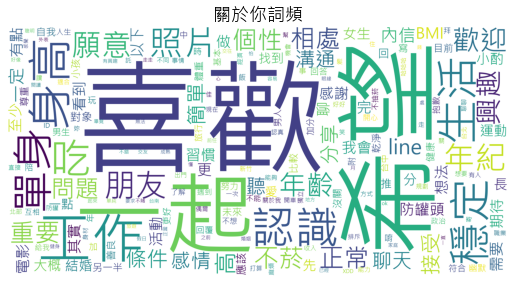

In [43]:
hist_cloud(about_you,100,"remove_you.txt" , "關於你詞頻")

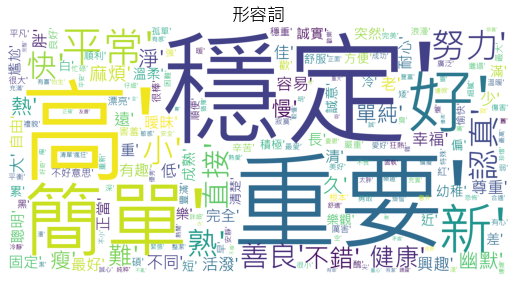

In [46]:
with open("adj.txt","r",encoding = "UTF-8") as f:
    adj = f.read()

adj_dict = Counter(adj)
adj = "".join(adj)

font = r'msjh.ttc'
my_wordcloud = WordCloud(background_color='white',font_path = font,max_font_size = 100,scale= 10,collocations=False).generate(adj)


plt.figure(figsize = (9,9))
plt.title("形容詞")
plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()

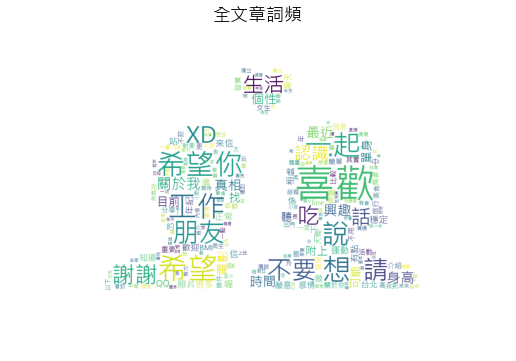

In [48]:
#全部詞頻文字雲

cloud_list = []
for i in range(0,len(jieba_list)):
    for j in range(0,len(jieba_list[i])):
        cloud_list.append(jieba_list[i][j])

cloud_list = " ".join(cloud_list)
    
font = r'msjh.ttc'
mask = np.array(Image.open('couple.PNG'))
my_wordcloud = WordCloud(background_color='white',mask = mask,font_path = font,collocations=False).generate(cloud_list)
    
plt.figure(figsize = (9,9))
plt.title("全文章詞頻")
plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()